In [1]:
import spacy
import pandas as pd
import numpy as np
from func import clean
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load('en_core_web_sm')
df = pd.read_csv('stories.csv')
sns.set_palette("Set2")

In [3]:
clean(df,nlp,'Story')

In [4]:
df

,Title,Story,Sentences,Cleaned,Tokenized,num_sen,num_tokens,mean_sen_length,mean_word_length
0,Jack and the Beanstalk,Once upon a time there lived a poor widow and ...,[Once upon a time there lived a poor widow and...,time live poor widow son jack day jack mother ...,"(time, live, poor, widow, son, jack, day, jack...",65,315,50.661538,4.438095
1,Little Red Riding Hood,Once upon a time there was a dear little girl ...,[Once upon a time there was a dear little girl...,time dear little girl love look grandmother gi...,"(time, dear, little, girl, love, look, grandmo...",88,608,86.488636,4.879934
2,Henny-Penny: The Sky is Falling!,One day Henny-penny was picking up corn in the...,[One day Henny-penny was picking up corn in th...,day henny penny pick corn rickyard whackan aco...,"(day, henny, penny, pick, corn, rickyard, whac...",74,518,65.351351,4.679537
3,The Little Match Girl,"Most terribly cold it was; it snowed, and was ...","[Most terribly cold it was; it snowed, and was...",terribly cold snow nearly dark evening evening...,"(terribly, cold, snow, nearly, dark, evening, ...",48,417,113.437500,5.153477
4,The Bogey-Beast,"There was once a woman who was very, very chee...","[There was once a woman who was very, very che...",woman cheerful little old poor lonely live lit...,"(woman, cheerful, little, old, poor, lonely, l...",89,359,53.764045,4.738162


In [5]:
df.to_csv('stories_pre.csv')

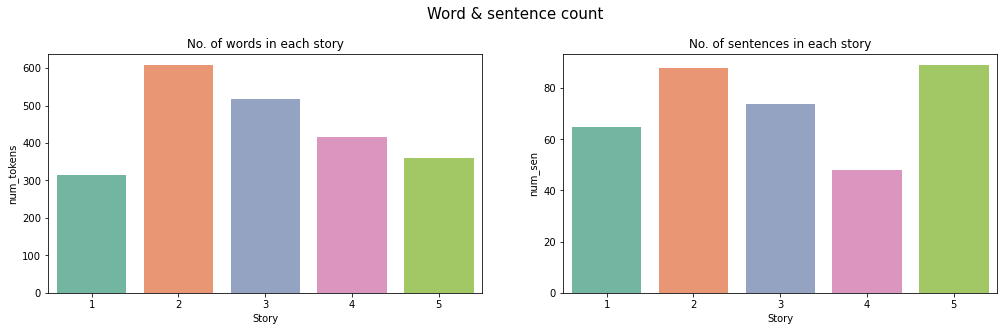

In [8]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
fig.tight_layout(pad=5)
fig.suptitle('Word & sentence count',fontsize=15)

sns.barplot(ax=ax[0],y=df.num_tokens,x=list(range(1,len(df)+1)))
ax[0].set_title('No. of words in each story')
ax[0].set_xlabel('Story')

sns.barplot(ax=ax[1],y=df.num_sen,x=list(range(1,len(df)+1)))
ax[1].set_title('No. of sentences in each story')
ax[1].set_xlabel('Story')

fig.savefig('Plots/Total words_sent.jpg',bbox_inches="tight")
plt.show()

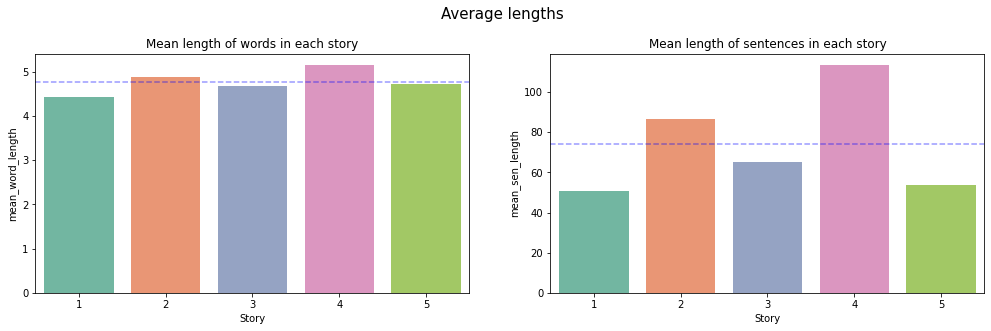

In [9]:
#Average word and sentence lengths
fig,ax = plt.subplots(1,2,figsize=(15,5))
fig.tight_layout(pad=5)
fig.suptitle('Average lengths',fontsize=15)


sns.barplot(ax=ax[0],y=df.mean_word_length,x=list(range(1,len(df)+1)))
ax[0].set_title('Mean length of words in each story')
ax[0].axhline(y=df.mean_word_length.mean(),linestyle='--',color='b',alpha=0.4)
ax[0].set_xlabel('Story')

sns.barplot(ax=ax[1],y=df.mean_sen_length,x=list(range(1,len(df)+1)))
ax[1].set_title('Mean length of sentences in each story')
ax[1].axhline(y=df.mean_sen_length.mean(),linestyle='--',color='b',alpha=0.4)
ax[1].set_xlabel('Story')

fig.savefig('Plots/Average word_sent.jpg',bbox_inches="tight")
plt.show()

In [10]:
entire = df['Cleaned'].tolist()
entire = ' '.join(entire)
vocab = list(set(nlp.tokenizer(entire)))
tokens = nlp(entire)
entire_text = [token.text for token in nlp(entire)]
print('Length of vocabulary: ',len(vocab))

Length of vocabulary:  2217


Most common words:  [('go', 67), ('say', 49), ('little', 45), ('penny', 36), ('grandmother', 32)]


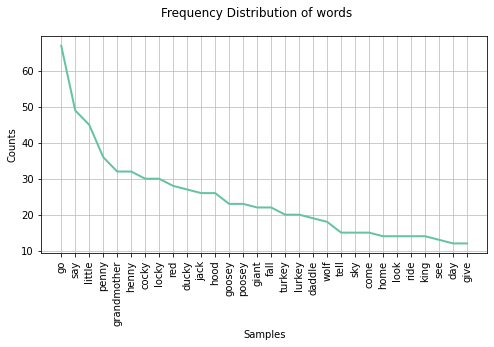

In [23]:
from nltk.probability import FreqDist
fig = plt.figure(figsize = (8,4))
fig.suptitle('Frequency Distribution of words')
fdist = FreqDist(entire_text)
print('Most common words: ',fdist.most_common(5))
fdist.plot(30,cumulative=False)
fig.savefig('Plots/Frequency Distribution.jpg',bbox_inches="tight")
plt.show()

In [12]:
from nltk.util import ngrams
from collections import Counter
unigrams_counter = Counter([item for item in ngrams(entire_text, 1)])
bigrams_counter = Counter([item for item in ngrams(entire_text, 2)])
trigrams_counter = Counter([item for item in ngrams(entire_text, 3)])

#Most common uni,bi,trigrams
most_uni = [word[0][0] for word in unigrams_counter.most_common(25)]
most_uni_count = [word[1] for word in unigrams_counter.most_common(25)]
most_bi = [(' '.join(word[0])) for word in bigrams_counter.most_common(15)]
most_bi_count = [word[1] for word in bigrams_counter.most_common(15)]
most_tri = [(' '.join(word[0])) for word in trigrams_counter.most_common(10)]
most_tri_count = [word[1] for word in trigrams_counter.most_common(10)]

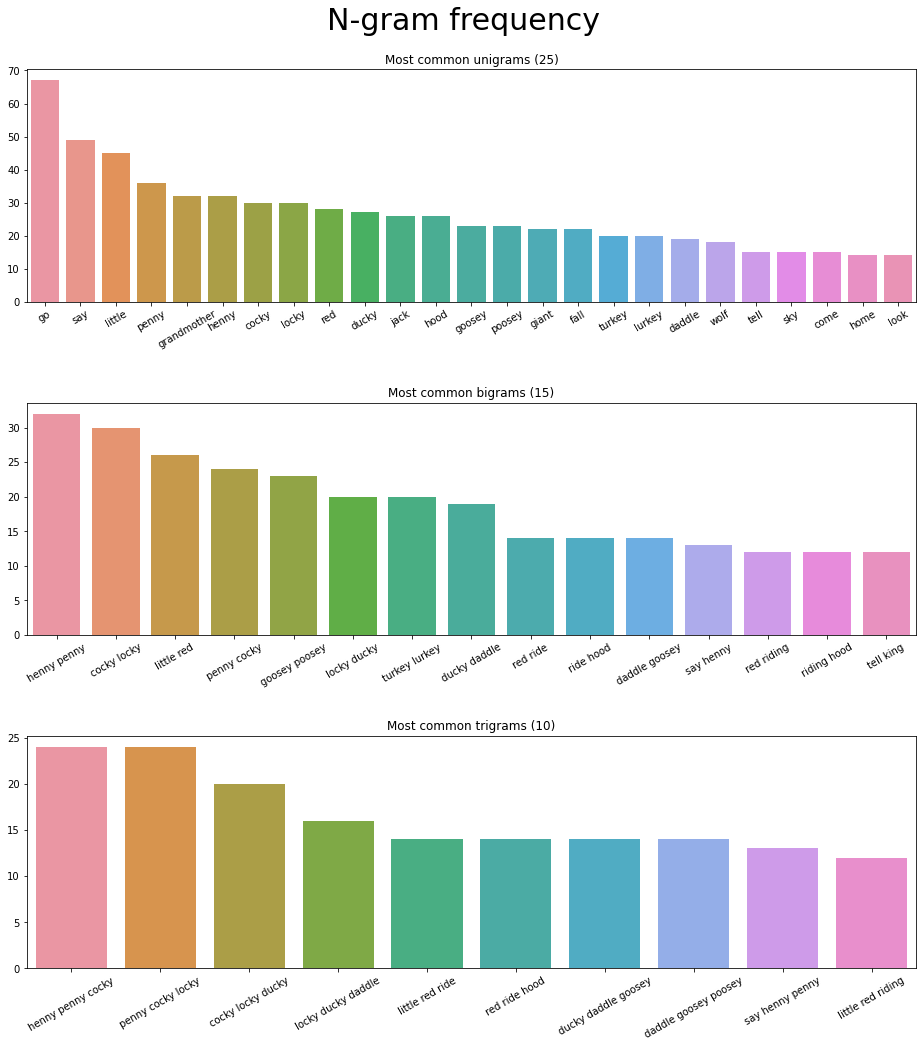

In [13]:
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(15, 15),sharex=False)
fig.tight_layout(pad=8)
fig.suptitle('N-gram frequency',fontsize=30)

sns.barplot(ax=ax[0],x=most_uni, y=most_uni_count)
ax[0].set_title('Most common unigrams (25)')
ax[0].tick_params(axis='x', labelrotation=30)

sns.barplot(ax=ax[1],x=most_bi, y=most_bi_count)
ax[1].set_title('Most common bigrams (15)')
ax[1].tick_params(axis='x', labelrotation=30)

sns.barplot(ax=ax[2],x=most_tri, y=most_tri_count)
ax[2].set_title('Most common trigrams (10)')
ax[2].tick_params(axis='x', labelrotation=30)

fig.savefig('Plots/n-grams.jpg',bbox_inches="tight")
plt.show()

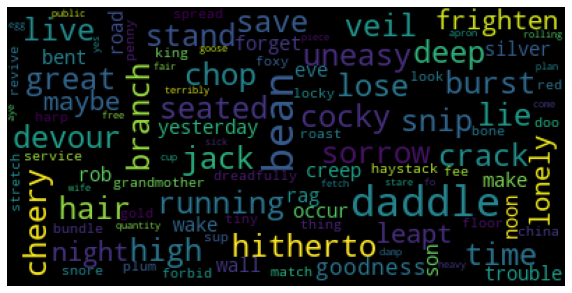

In [20]:
from wordcloud import WordCloud
wc = WordCloud(background_color='black', max_words=100, colormap='viridis',max_font_size=30)
wc = wc.generate(' '.join(set(entire_text)))
fig = plt.figure(num=1,figsize=(10,10))
plt.axis('off')

fig.savefig('Plots/Wordcloud.jpg',bbox_inches="tight")

plt.imshow(wc, cmap=None)
plt.show()

In [21]:
from collections import Counter
c = Counter(([token.pos_ for token in nlp(entire)]))
pos = []
sbase = sum(c.values())
for el, cnt in c.items():
    pos.append([spacy.explain(el),(100.0* cnt)/sbase])


<ipython-input-22-d86cef02613d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


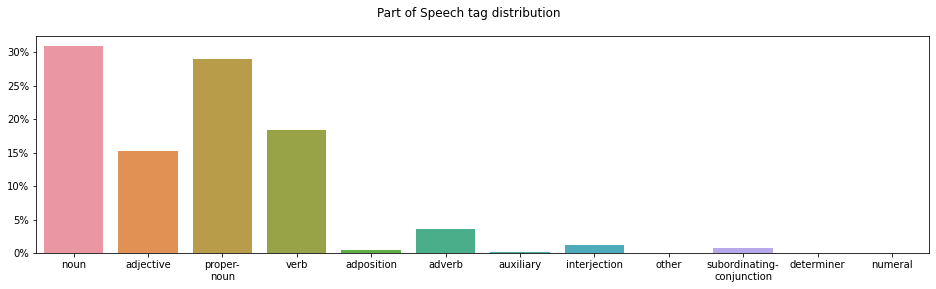

In [22]:
fig = plt.figure(figsize = (16,4))
fig.suptitle('Part of Speech tag distribution')
sns.barplot(x=[row[0].replace(' ', '-\n') for row in pos],y=[row[1] for row in pos])
fig.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 
fig.savefig('Plots/PoS Distribution.jpg',bbox_inches="tight")
plt.show()